In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [2]:
img_dir = '/content/drive/MyDrive/Datasets/COVID-19_Lung_CT_Scans'

In [3]:
BATCH_SIZE = 128
IMAGE_SIZE = 128
input_shape = (128,128,1)

In [4]:
data_gen = ImageDataGenerator(rescale=1./255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              validation_split = 0.2)

In [5]:
train_gen = data_gen.flow_from_directory(img_dir,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "grayscale",
                                        shuffle=True,
                                        class_mode = "binary",
                                        subset = "training")

Found 6752 images belonging to 2 classes.


In [6]:
val_gen = data_gen.flow_from_directory(img_dir,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "grayscale",
                                        shuffle=True,
                                        class_mode = "binary",
                                        subset = "validation")

Found 1687 images belonging to 2 classes.


In [7]:
labels = train_gen.class_indices
classes = list(labels.keys())

print(classes)

['COVID-19', 'Non-COVID-19']


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D ,BatchNormalization, Flatten, Dropout

In [9]:

model = Sequential()
model.add(keras.layers.InputLayer(input_shape=input_shape))
model.add(Conv2D(16,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(16,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
#model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
#model.add(Dense(4, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 311,793 (1.19 MB)

 Trainable params: 311,793 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
len(train_gen),len(val_gen)

(53, 14)

In [12]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_gen,verbose=1,epochs=10,validation_data=val_gen,steps_per_epoch = len(train_gen),validation_steps = len(val_gen))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


53/53 ━━━━━━━━━━━━━━━━━━━━ 1980s 37s/step - accuracy: 0.8817 - loss: 0.3886 - val_accuracy: 0.8868 - val_loss: 0.3688
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - accuracy: 0.9088 - loss: 0.2584 - val_accuracy: 0.8832 - val_loss: 0.2881
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.9287 - loss: 0.2104 - val_accuracy: 0.9010 - val_loss: 0.2967
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.9345 - loss: 0.1878 - val_accuracy: 0.9182 - val_loss: 0.2332
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.9508 - loss: 0.1475 - val_accuracy: 0.9188 - val_loss: 0.2428
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.9581 - loss: 0.1203 - val_accuracy: 0.9129 - val_loss: 0.2784
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 158s 3s/step - accuracy: 0.9602 - loss: 0.1161 - val_accuracy: 0.9188 - val_loss: 0.2306
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.9674 - loss: 0.0959 - val_accuracy: 0.9455 - val_loss: 

<Axes: >

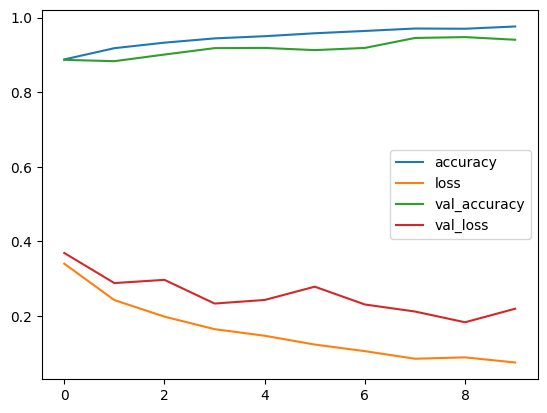

In [13]:
pd.DataFrame(history.history).plot()

In [14]:
model.save('CovidTest.h5')

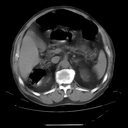

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
No COVID detected


In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps



data = np.ndarray(shape=(1,128, 128, 1), dtype=np.float32)
#image = Image.open(f'/Users/adityavs14/Documents/Internship/Pianalytix/COVID/ML_model/data2/COVID-19/COVID-19_0231.png')
image = Image.open(f'/content/drive/MyDrive/Datasets/COVID-19_Lung_CT_Scans/Non-COVID-19/Non-COVID-19_922.png')
size = (128, 128)
image = ImageOps.grayscale(image)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
image_array = np.asarray(image)
display(image)

data = image_array.reshape((-1,128,128,1))/255

prediction = np.round(model.predict(data)[0][0])
if prediction == 0:
    print('COVID detected')
else:
    print('No COVID detected')




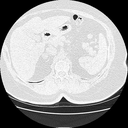

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
COVID detected


In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps



data = np.ndarray(shape=(1,128, 128, 1), dtype=np.float32)
#image = Image.open(f'/Users/adityavs14/Documents/Internship/Pianalytix/COVID/ML_model/data2/COVID-19/COVID-19_0231.png')
image = Image.open(f'/content/drive/MyDrive/Datasets/COVID-19_Lung_CT_Scans/COVID-19/COVID-19_0231.png')
size = (128, 128)
image = ImageOps.grayscale(image)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
image_array = np.asarray(image)
display(image)

data = image_array.reshape((-1,128,128,1))/255

prediction = np.round(model.predict(data)[0][0])
if prediction == 0:
    print('COVID detected')
else:
    print('No COVID detected')